step_1_lesson_7.csv
Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. Данные для построения графика хранятся здесь.

step_2_lesson_7.csv
Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Данные лежат здесь.
Ответ округлите до целого.

step_3_lesson_7.csv
Давайте выясним, с какого браузера приходит БОЛЬШЕ всего ботов. Посмотрите на данные и определите, у какого браузера самая БОЛЬШАЯ доля посещений сайта ботами от общего числа посещений?
В качестве ответа укажите название браузера.

step_4_lesson_7.csv
Съагрегируйте данные по дню, типу пользователя, браузеру, создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.
В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.
Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

💀 Сложное задание! 💀
При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. Далее отправьте ссылку на получившийся файл в Google SpreadSheet (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) при помощи vk api себе в личку ВКонтакте.

⭐️Задание со звёздочкой!⭐️
Другой аналитик уже агрегировал часть данных из метрики, и вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.
В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)
Вот так можно прочитать данные другого аналитика:

from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [ ]:
import pandas as pd
import requests
import json
import seaborn as sns
from urllib.parse import urlencode #Используем эту библиотеку, для того чтобы из словаря params, сконструировать ссылку

In [ ]:
#Полная ссылка
#https://api-metrika.yandex.net/stat/v1/data?metrics=ym:s:visits&dimensions=ym:s:date&filters=ym:s:date=='2020-06-15'&dimensions=ym:s:isRobot&id=44147844

In [ ]:
#url = 'https://api-metrika.yandex.net/stat/v1/data?'
#visits = "metrics=ym:s:visits&dimensions=ym:s:date&filters=ym:s:date=='{date}'&dimensions=ym:s:isRobot&id=44147844"



In [ ]:
#Не забывать обновлять список с датами, иначе данные апи будут не корреткны. Ставить сегодняшнюю дату и далее
dates = ['2024-02-10','2024-02-11','2024-02-12']

url = 'https://api-metrika.yandex.net/stat/v1/data?'

df = pd.DataFrame()

for date in dates:
  params = {'metrics' : 'ym:s:visits',
          'dimensions' : ['ym:s:date', 'ym:s:isRobot'],
          'filters' : f"ym:s:date=='{date}'",
          'id' : 44147844}
  visits = urlencode(params, doseq=True) #doseq=True для того чтобы в словаре params считать это значение ['ym:s:date', 'ym:s:isRobot'], необходимо для параметров которые переданы в списке
  #visits = f"metrics=ym:s:visits&dimensions=ym:s:date&filters=ym:s:date=='{date}'&dimensions=ym:s:isRobot&id=44147844"
  url_visits = url + visits
  response = requests.get(url_visits)

  json_data = response.json()

  for i in json_data['data']:
    intermediate_data = i['dimensions']
    date = intermediate_data[0]['name']
    robot_type = intermediate_data[1]['name']
    visits = i['metrics'][0]

    row = [[date, robot_type, visits]]
    df = df.append(row)
    #print(intermediate_data[0]['name'], intermediate_data[1]['name'], metric)

<ipython-input-193-81413959da06>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
<ipython-input-193-81413959da06>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
<ipython-input-193-81413959da06>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
<ipython-input-193-81413959da06>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)


In [ ]:
response.text

'{"query":{"ids":[44147844],"dimensions":["ym:s:date","ym:s:isRobot"],"metrics":["ym:s:visits"],"sort":["-ym:s:visits"],"date1":"2024-02-10","date2":"2024-02-16","filters":"ym:s:date==\'2024-02-12\'","limit":100,"offset":1,"group":"Week","auto_group_size":"1","attr_name":"","quantile":"50","offline_window":"21","attribution":"LastSign","currency":"RUB","adfox_event_id":"0"},"data":[{"dimensions":[{"name":"2024-02-12"},{"name":"People","id":"no"}],"metrics":[486.0]},{"dimensions":[{"name":"2024-02-12"},{"name":"Robots","id":"yes"}],"metrics":[90.0]}],"total_rows":2,"total_rows_rounded":false,"sampled":false,"contains_sensitive_data":false,"sample_share":1.0,"sample_size":3087,"sample_space":3087,"data_lag":0,"totals":[576.0],"min":[90.0],"max":[486.0]}'

In [ ]:
json_data = response.json()
json_data

In [ ]:
type(json_data)

In [ ]:
df.columns = ['date', 'type', 'visits']

In [ ]:
df

,date,type,visits
0,2024-02-10,People,337.0
0,2024-02-10,Robots,73.0
0,2024-02-11,People,351.0
0,2024-02-11,Robots,118.0
0,2024-02-12,People,486.0
0,2024-02-12,Robots,90.0


In [ ]:
#Тест
dates = ['2024-02-09','2024-02-10','2024-02-11']

url = 'https://api-metrika.yandex.net/stat/v1/data?'

df = pd.DataFrame()

for date in dates:
  params = {'metrics' : 'ym:s:visits',
          'dimensions' : ['ym:s:date', 'ym:s:isRobot'],
          'filters' : f"ym:s:date=='{date}'",
          'id' : 44147844}
  visits = urlencode(params, doseq=True) #doseq=True для того чтобы в словаре params считать это значение ['ym:s:date', 'ym:s:isRobot'], необходимо для параметров которые переданы в списке
  #visits = f"metrics=ym:s:visits&dimensions=ym:s:date&filters=ym:s:date=='{date}'&dimensions=ym:s:isRobot&id=44147844"
  url_visits = url + visits
  response = requests.get(url_visits)
  print(url_visits)


https://api-metrika.yandex.net/stat/v1/data?metrics=ym%3As%3Avisits&dimensions=ym%3As%3Adate&dimensions=ym%3As%3AisRobot&filters=ym%3As%3Adate%3D%3D%272024-02-09%27&id=44147844
https://api-metrika.yandex.net/stat/v1/data?metrics=ym%3As%3Avisits&dimensions=ym%3As%3Adate&dimensions=ym%3As%3AisRobot&filters=ym%3As%3Adate%3D%3D%272024-02-10%27&id=44147844
https://api-metrika.yandex.net/stat/v1/data?metrics=ym%3As%3Avisits&dimensions=ym%3As%3Adate&dimensions=ym%3As%3AisRobot&filters=ym%3As%3Adate%3D%3D%272024-02-11%27&id=44147844


<Axes: xlabel='date', ylabel='visits'>

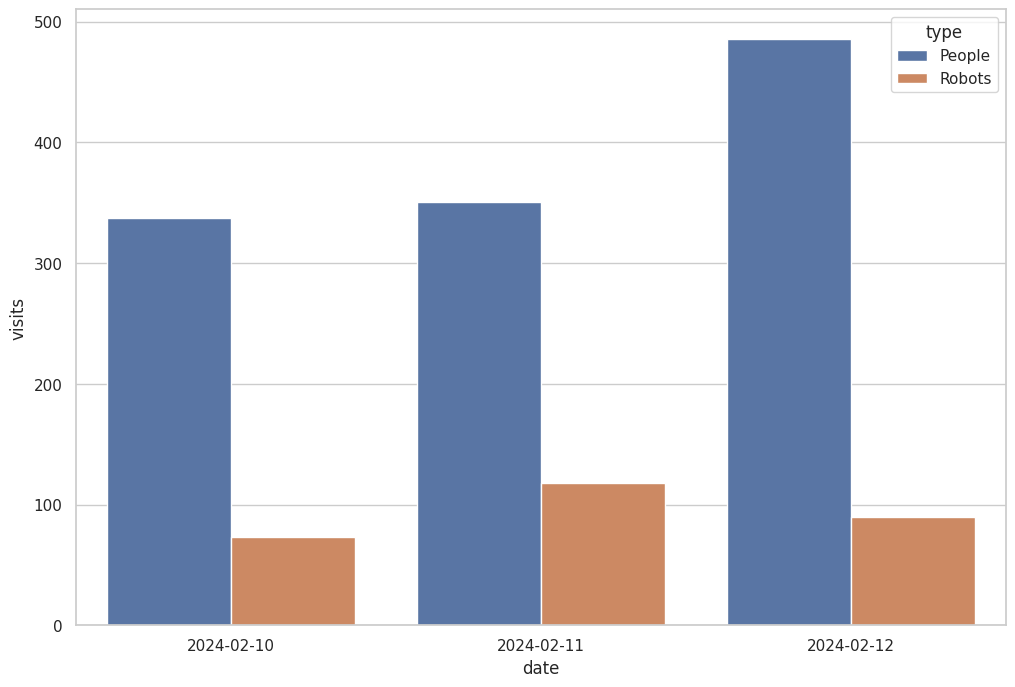

In [ ]:
#Строим график
sns.set(style='whitegrid',
        rc={'figure.figsize':(12,8)})
sns.barplot(x ='date', y='visits', hue = 'type', data = df) # hue = 'type' - разбивает по колоке с типами

**2**

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/step_2_lesson_7.csv')

In [ ]:
df.head(20)

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [ ]:
sum_visits = pd.Series(df.visits.sum())
sum_visits

0    594.0
dtype: float64

In [ ]:
chrome = pd.Series(df.query('browser == "Google Chrome"').visits.sum())
chrome


0    354.0
dtype: float64

In [ ]:
(chrome.div(sum_visits)).multiply(100).round()

0    60.0
dtype: float64

**3**

step_3_lesson_7.csv Давайте выясним, с какого браузера приходит БОЛЬШЕ всего ботов. Посмотрите на данные и определите, у какого браузера самая БОЛЬШАЯ доля посещений сайта ботами от общего числа посещений? В качестве ответа укажите название браузера.

In [ ]:
df = pd.read_csv('/content/step_3_lesson_7.csv')
df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [ ]:
df.groupby(['browser', 'user_type'], as_index = False).agg({'visits' : 'sum'})

In [ ]:
piv_table = df.groupby(['browser', 'user_type'], as_index = False) \
          .agg({'visits' : 'sum'}) \
          .pivot(index = 'browser', columns = 'user_type', values = 'visits' ) \
          .reset_index().fillna(0)
piv_table

user_type,browser,People,Robots
0,Android Browser,1.0,0.0
1,Chrome Mobile,31.0,0.0
2,Chromium,1.0,1.0
3,CocCoc,1.0,0.0
4,Edge,4.0,1.0
5,Firefox,27.0,31.0
6,Google Chrome,250.0,104.0
7,Mobile Safari,15.0,1.0
8,Opera,11.0,5.0
9,Safari,19.0,22.0


In [ ]:
max_index = piv_table['Robots'].idxmax()
max_index

6

In [ ]:
browser_name = piv_table.loc[max_index, 'browser']
browser_name

'Google Chrome'

**4**

step_4_lesson_7.csv Съагрегируйте данные по дню, типу пользователя, браузеру, создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [ ]:
df = pd.read_csv('/content/step_4_lesson_7.csv')
df.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [ ]:
df.duplicated(['date', 'browser',	'user_type']).any() #нет дубликатов

False

In [ ]:
df['percent'] = (df.visits / df.visits.sum())*100

In [ ]:
df

In [ ]:
df.query('user_type == "People" and browser == "Safari"').percent.round(1)

7    3.2
Name: percent, dtype: float64

**5**

💀 Сложное задание! 💀

При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. Далее отправьте ссылку на получившийся файл в Google SpreadSheet (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) при помощи vk api себе в личку ВКонтакте.